<a href="https://colab.research.google.com/github/hasiniranasinghe/machine-leraning/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  simple autoencoder

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

 decoder model:

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.3638 - val_loss: 0.2711
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2632 - val_loss: 0.2515
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2404 - val_loss: 0.2274
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2196 - val_loss: 0.2099
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2050 - val_loss: 0.1977
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1945 - val_loss: 0.1885
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1863 - val_loss: 0.1811
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1796 - val_loss: 0.1749
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.1737 - val_loss: 0.1695
Epoch

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

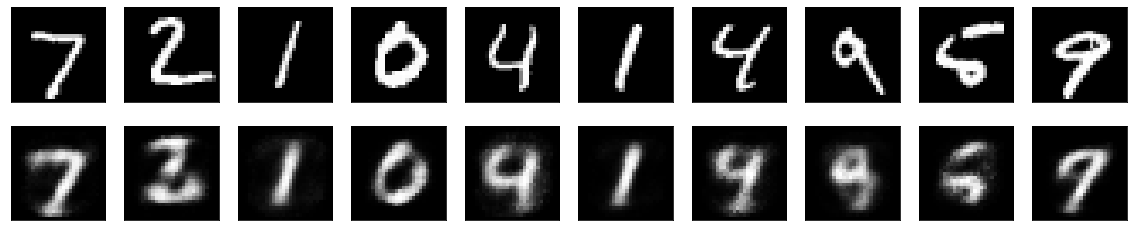

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:


from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


In [11]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 77us/step - loss: 0.3350 - val_loss: 0.2644
Epoch 2/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2570 - val_loss: 0.2500
Epoch 3/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.2338 - val_loss: 0.2183
Epoch 4/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.2140 - val_loss: 0.2079
Epoch 5/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2012 - val_loss: 0.1947
Epoch 6/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1906 - val_loss: 0.1852
Epoch 7/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1820 - val_loss: 0.1766
Epoch 8/100
60000/60000 [==============================] - 4s 73us/step - loss: 0.1758 - val_loss: 0.1711
Epoch 9/100
60000/60000 [==============================] - 4s 75us/step - loss: 0.1699 - val_loss: 0.1

# image denoising

In [22]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [24]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
21632/60000 [=========>....................] - ETA: 1:34 - loss: 0.1438